In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Workshop: Olympic Medals

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.png" width=300>

First clone the repository at [https://github.com/daniprec/BAM-Coding-Lab](https://github.com/daniprec/BAM-Coding-Lab)

You will find the data inside `data/olympics`.


## 🔍 Data Loading and EDA

In [12]:
path_folder = "../data/olympics/"
path_csv = path_folder + "olympics_medals.csv"

# We use "read_csv" to load a "csv" file
df = pd.read_csv(path_csv)

# "head(n)" returns the first n rows
df.head(5)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


In [ ]:
# "shape" returns the number of rows and columns
print(df.shape)

In [ ]:
# "columns" returns the column names
print(df.columns)

In [ ]:
# "info()" prints a concise summary of a dataframe
print(df.info())

---

## ⚡ Data Cleaning and Processing

The **"edition"** column contains the season and year, for instance "2020 Summer Olympics". Lets try to split this information into two columns:
- **"year"**, for instance "2020" (should be an integer).
- **"season"**, for instance "Summer" (as a string).

In [ ]:
print(df["edition"].value_counts())

In [ ]:
# We use the string method "split"
# Alternative: use regex with "re" library (more robust)
df["year"] = df["edition"].apply(lambda x: int(x.split()[0]))
print(df["year"].value_counts()[:5])

df["season"] = df["edition"].apply(lambda x: x.split()[1])
print(df["season"].value_counts())

During EDA we have seen that the **"medal"** column has NaNs. These non-values represence the absence of a medal. To avoid confussion, lets replace it with a value!

In [ ]:
# We first see the values contained inside the "medal" column
print(df["medal"].value_counts())

In [ ]:
# Replace NaNs with "No"
df["medal"].fillna("No", inplace=True)

print(df["medal"].value_counts())

**Exercise:** In the column "event" you will see that some sports have the "Men" tag while others have the "Women" tag. Split the column into two:
- "event_simple" with the name without gender.
- "gender" being either "Men", "Women" or "Unknown".

For instance, the value "Football, Men" should turn into "Football" and "Men"

In [13]:
def split_event_gender(event: str) -> tuple:
  if "women" in event.lower():
    return event.split(", ")[0], "Women"
  elif "men" in event.lower():
    return event.split(", ")[0], "Men"
  else:
    return event, "Unknown"

df[["event_simple", "gender"]] = df["event"].apply(split_event_gender).apply(pd.Series)

---

## 📊 Using the Data

### ⚽ Sport Events

**Exercise:** Find how many sport events there are. Ignore gender, i.e. "Football, Men" and "Football, Women" count only as one.

In [ ]:
print(df["event_simple"].value_counts())

**Exercise:** Plot a graph that shows the number of different sport events per year. Make a distinction between Summer and Winter olympics (and any other kind if any).

In [ ]:
events_per_year = df.groupby(["year", "season"], as_index=False)["event_simple"].nunique()

events_per_year.head(5)

In [ ]:
# Color by season
def color_season(season: str) -> str:
  if season.lower() == "summer":
    return "red"
  elif season.lower() == "winter":
    return "blue"
  else:
    return "gray"

# Create a scatter plot
color = events_per_year["season"].map(color_season)

plt.figure(figsize=(10, 6))
plt.scatter(events_per_year["year"], events_per_year["event_simple"], c=color)
plt.xlabel("Year")
plt.ylabel("Number of Sports")
plt.show()

### 🏅 Medalists

**Exercise:** Find the athlete with the most medals. How many do they have?

In [ ]:
mask_medal = df["medal"] != "No"
medal_by_athletes = df.loc[mask_medal, "athlete"].value_counts()
top_athlete = medal_by_athletes.idxmax()

print(f"Top athlete is {top_athlete} with {medal_by_athletes[top_athlete]}")

**Exercise:** Compute the number of gold medals won by each country. Make a bar plot with the top 10 countries.

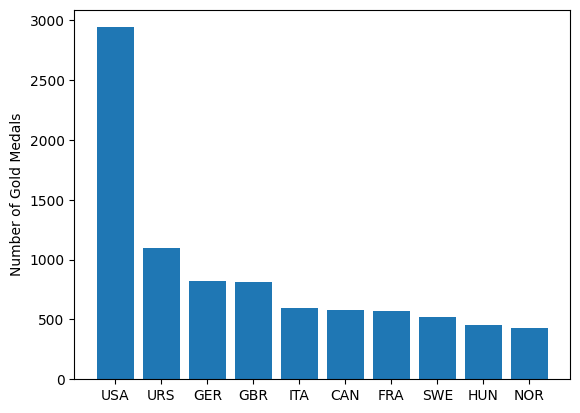

In [14]:
mask_gold = df["medal"] == "Gold"
gold_by_country = df.loc[mask_gold, "country_noc"].value_counts()

plt.bar(gold_by_country.index[:10], gold_by_country.values[:10])
plt.ylabel("Number of Gold Medals")
plt.show()
plt.close()

**Exercise:** Now do a stacked bar plot with the number of gold, silver and bronze medals. Show the 10 countries with the biggest total amount.

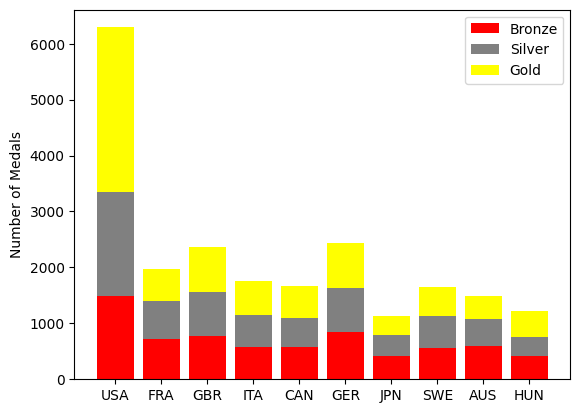

In [15]:
mask_medals = df["medal"] != "No"
medals_by_country = df.loc[mask_medals, "country_noc"].value_counts()
top_countries = medals_by_country.index[:10].tolist()

mask_bronze = df["medal"] == "Bronze"
bronze_by_country = df.loc[mask_bronze, "country_noc"].value_counts()
bronze = bronze_by_country[top_countries]
plt.bar(top_countries, bronze, color="red", label="Bronze")

mask_silver = df["medal"] == "Silver"
silver_by_country = df.loc[mask_silver, "country_noc"].value_counts()
silver = silver_by_country[top_countries]
plt.bar(top_countries, silver, bottom=bronze, color="gray", label="Silver")

mask_gold = df["medal"] == "Gold"
gold_by_country = df.loc[mask_gold, "country_noc"].value_counts()
gold = gold_by_country[top_countries]
plt.bar(top_countries, gold, bottom=bronze+silver, color="yellow", label="Gold")

plt.legend()
plt.ylabel("Number of Medals")
plt.show()
plt.close()

---

### ➕ Adding More Data

Merge both datasets and save the result.

In [ ]:
path_csv = path_folder + "/olympics_medals_2024.csv"

df_new = pd.read_csv(path_csv)
df_new.head(5)

In [ ]:
df_new["medal_code"].value_counts()